In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
x.shape

(1000, 2)

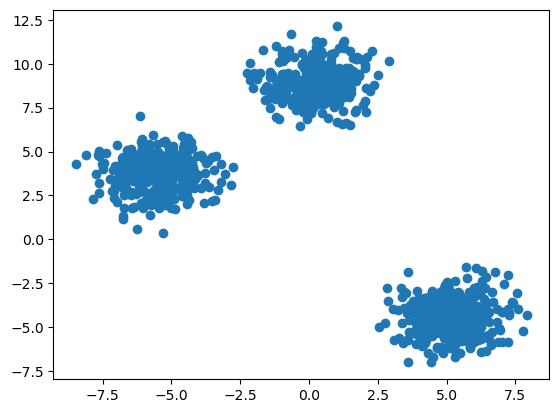

In [4]:
plt.scatter(x[:,0],x[:,1])

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x,y, test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
#Manual process
# elbow method

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

In [8]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 992.0624178531958,
 854.1121256565148,
 756.226424910937,
 663.6881555178848,
 579.24630413726,
 533.280565166281]

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [10]:
y_labels=kmeans.fit_predict(x_train)

C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [11]:
y_test_labels=kmeans.predict(x_test)

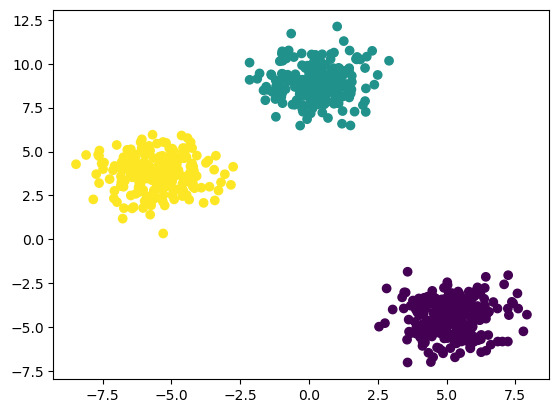

In [12]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

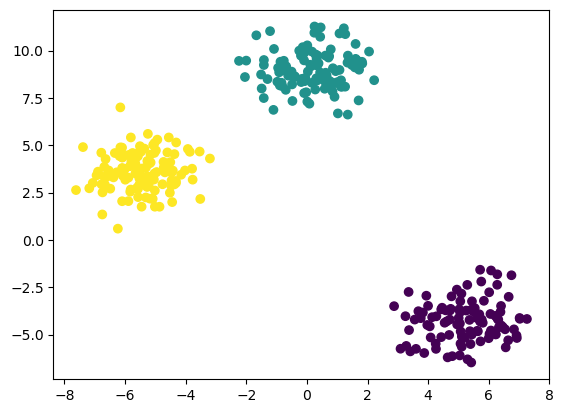

In [13]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_labels)

In [15]:
!pip install kneed

In [14]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [17]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow
               

3

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

In [17]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.34049599516161716,
 0.3466634066539347,
 0.3433289183268384,
 0.34532164692344375,
 0.3425680753808771]

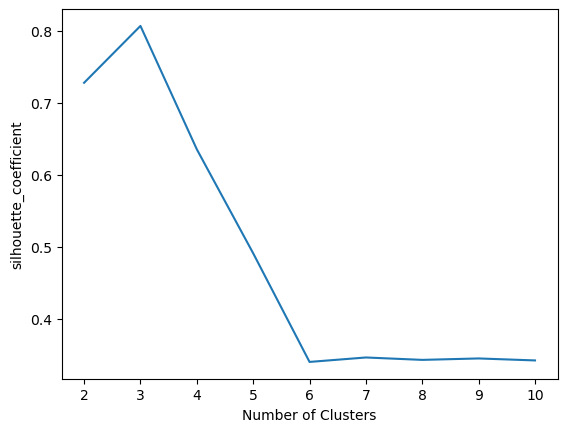

In [18]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficient")
plt.show()

In [22]:
#hiererical clustering

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [20]:
iris=datasets.load_iris()

In [21]:
iris_data=pd.DataFrame(iris.data)

In [22]:
iris_data.columns=iris.feature_names

In [23]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
x_scaled=scaler.fit_transform(iris_data)

In [26]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [27]:
x_scaled.shape

(150, 4)

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=2)

In [30]:
pca_scaled=pca.fit_transform(x_scaled)

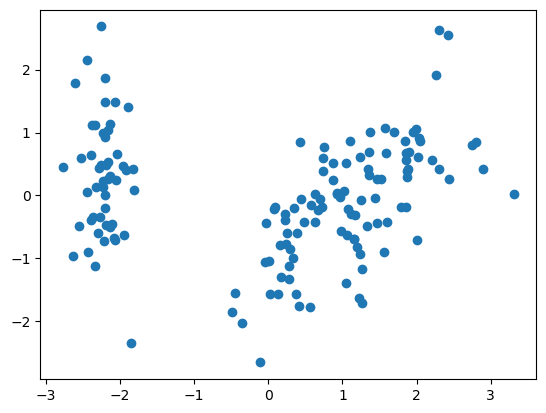

In [31]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledion Distance')

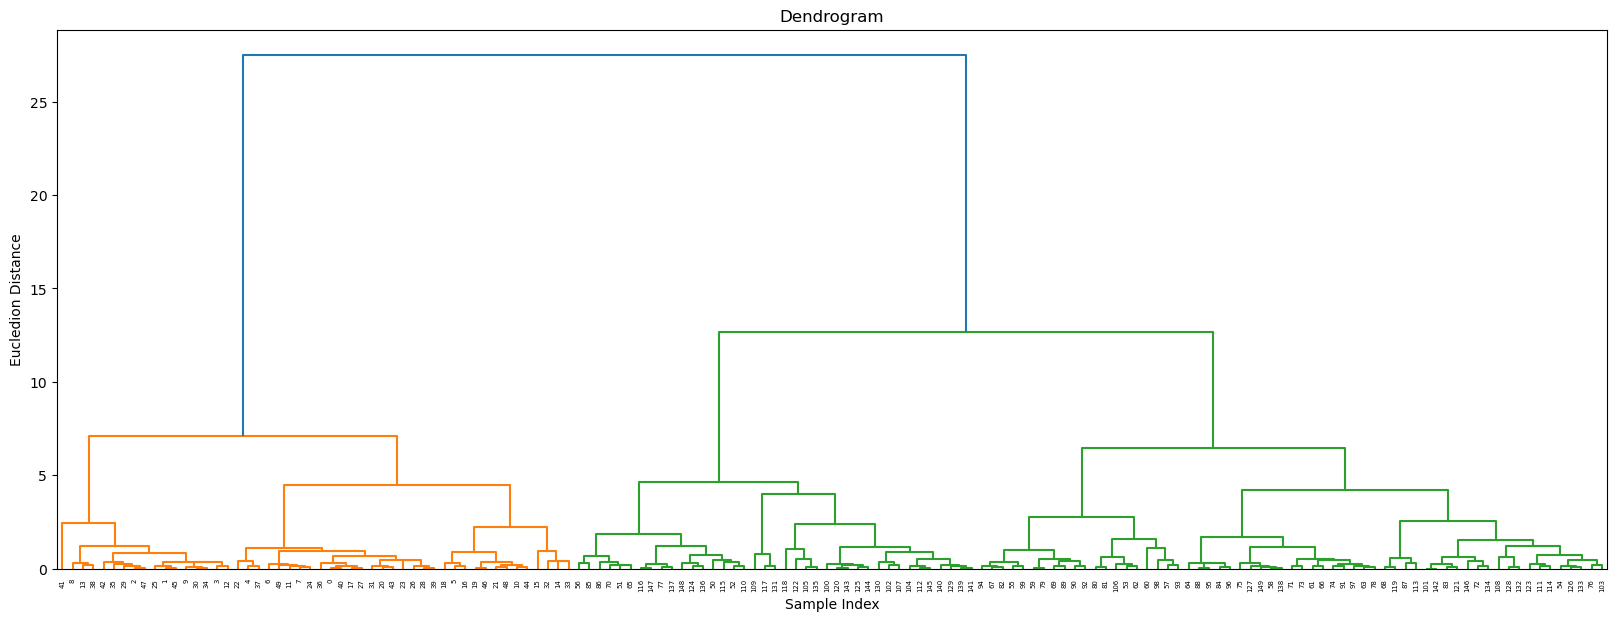

In [32]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))

plt.title("Dendograms")

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledion Distance')

In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [34]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

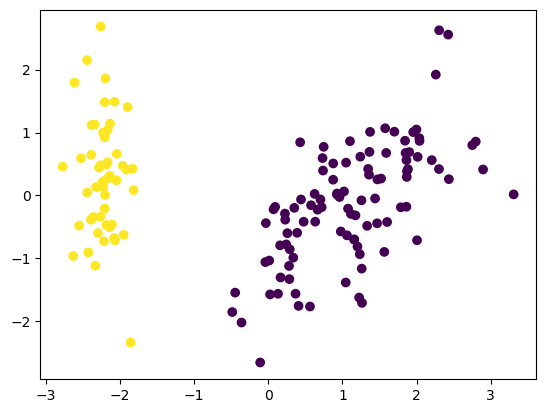

In [35]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_coefficients = []

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(x_scaled)
    score = silhouette_score(x_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\SHAUGARG\AppData\Local\ananconda\Lib\site-packages\sklearn\clus

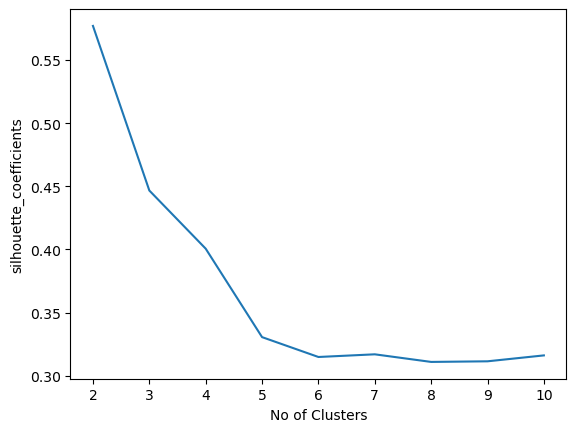

In [39]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

#DBSCAN Clustering

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
x,y=make_moons(n_samples=250,noise=0.05)

In [41]:
x

array([[ 1.91095231e+00,  4.35540095e-01],
       [ 6.13504259e-01, -4.15395371e-01],
       [-9.95199178e-01, -3.90254536e-02],
       [ 3.97242905e-01,  9.05759836e-01],
       [ 3.80110230e-02,  8.71569256e-02],
       [ 9.41063921e-01,  4.03576385e-01],
       [ 4.80291600e-01,  7.84474915e-01],
       [ 5.51175416e-01, -3.92609282e-01],
       [ 8.21490593e-01, -5.04581691e-01],
       [ 8.18729826e-01,  5.91575824e-01],
       [ 9.43684046e-01, -1.92767453e-02],
       [ 1.12143249e+00, -4.70697486e-01],
       [ 7.99726442e-01,  5.95692385e-01],
       [ 1.99145925e+00,  2.88752440e-01],
       [ 1.70700140e+00, -1.18291816e-01],
       [ 1.03192217e+00, -3.81681511e-01],
       [ 2.37971736e-01, -1.37792025e-01],
       [ 1.96813690e+00,  3.65544664e-01],
       [ 8.29049444e-01, -4.83269707e-01],
       [ 1.84188780e+00,  9.59349978e-02],
       [ 9.07929523e-01,  3.02983589e-02],
       [ 1.51238704e+00, -2.85902380e-01],
       [-1.06187538e+00,  1.49718382e-01],
       [ 1.

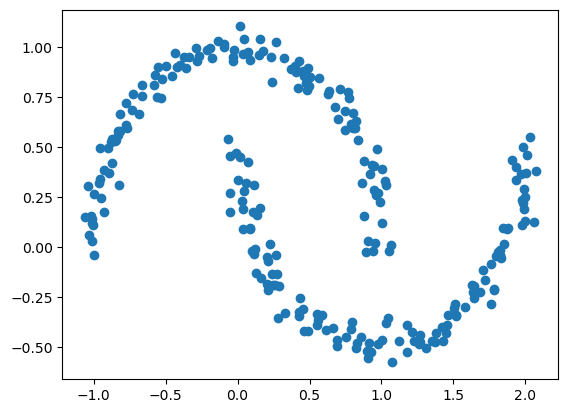

In [42]:
plt.scatter(x[:,0],x[:,1])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
x_scaled=scaler.fit_transform(x)

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan=DBSCAN(eps=0.5, min_samples=5)

In [47]:
dbscan.fit(x_scaled)

DBSCAN()

In [48]:
dbscan.labels_

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

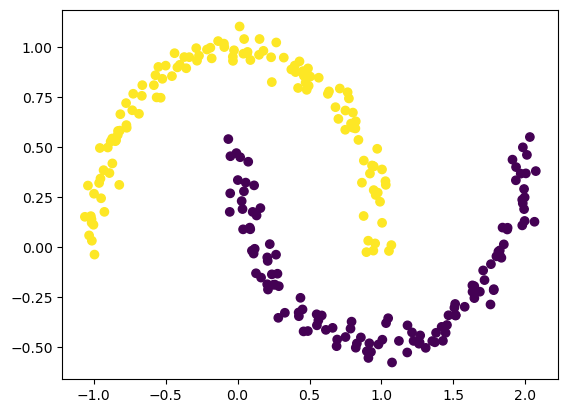

In [49]:
plt.scatter(x[:,0],x[:,1],c=dbscan.labels_)

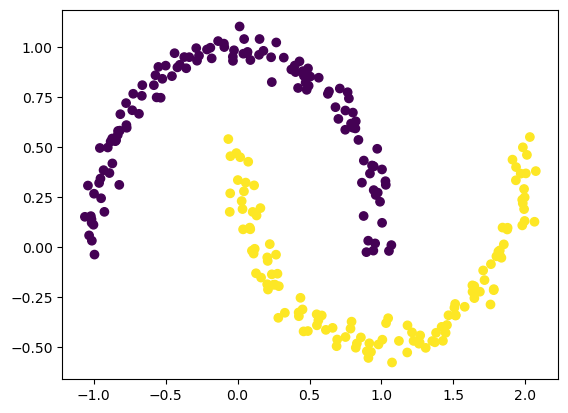

In [50]:
plt.scatter(x[:,0],x[:,1],c=y)

#Anamoly DBSCAN Clustering

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [52]:
x,y = make_circles(n_samples=750, factor=0.3, noise=0.1)

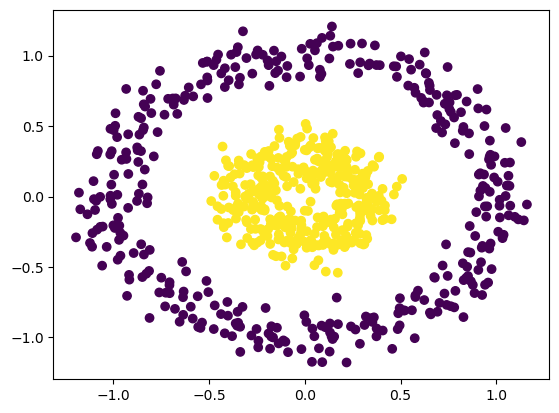

In [54]:
plt.scatter(x[:,0],x[:,1],c=y)

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
dbscan=DBSCAN(eps=0.10)

In [60]:
dbscan.fit_predict(x)

array([ 0,  1,  9,  1,  1,  2, -1,  1,  1,  3,  4,  1, -1,  1,  5,  6,  7,
       11,  1,  4,  2,  1,  6,  1,  8,  1,  1,  1,  1,  1,  5,  8,  1,  8,
        1,  7,  4,  3, 14,  3,  2,  9,  4,  1,  6,  1, -1,  1,  1,  1, -1,
        1,  5,  1,  1,  9,  1,  1,  4,  5,  1,  1,  1,  1, 10,  2,  8, 10,
        1,  1,  5,  1,  1, -1,  1,  1,  1,  1,  6,  9,  1, -1,  5,  1,  9,
       11,  1,  1,  5,  7,  8,  1,  4,  1,  8,  1,  5,  1,  1,  1, 13,  1,
        5,  1,  1,  3,  9,  1,  1,  1, 12,  1,  7,  4,  1,  3,  1, -1,  1,
        0,  1, 12,  7,  1,  4,  1,  1,  1,  1,  1,  2,  1,  8,  1, 10,  5,
       12,  1,  8, -1,  1,  9,  8,  1,  8,  3,  3,  4,  1,  1,  1,  1,  1,
       10, 12,  8,  2,  1,  1,  1,  1,  2,  1,  6,  9, -1,  4,  1,  1,  1,
        1, 14,  4,  1, 13,  3,  1, -1,  1,  1,  5,  5,  1,  1,  3,  1,  5,
        1,  2,  1,  1, 12,  5,  1,  1,  1,  0, -1,  1,  1,  6,  4,  0,  1,
       11,  3,  1,  0,  1, 14,  0,  5, -1,  2,  6,  2, -1, 12,  1,  1,  1,
        1,  5,  1, 14,  1

In [61]:
dbscan.labels_

array([ 0,  1,  9,  1,  1,  2, -1,  1,  1,  3,  4,  1, -1,  1,  5,  6,  7,
       11,  1,  4,  2,  1,  6,  1,  8,  1,  1,  1,  1,  1,  5,  8,  1,  8,
        1,  7,  4,  3, 14,  3,  2,  9,  4,  1,  6,  1, -1,  1,  1,  1, -1,
        1,  5,  1,  1,  9,  1,  1,  4,  5,  1,  1,  1,  1, 10,  2,  8, 10,
        1,  1,  5,  1,  1, -1,  1,  1,  1,  1,  6,  9,  1, -1,  5,  1,  9,
       11,  1,  1,  5,  7,  8,  1,  4,  1,  8,  1,  5,  1,  1,  1, 13,  1,
        5,  1,  1,  3,  9,  1,  1,  1, 12,  1,  7,  4,  1,  3,  1, -1,  1,
        0,  1, 12,  7,  1,  4,  1,  1,  1,  1,  1,  2,  1,  8,  1, 10,  5,
       12,  1,  8, -1,  1,  9,  8,  1,  8,  3,  3,  4,  1,  1,  1,  1,  1,
       10, 12,  8,  2,  1,  1,  1,  1,  2,  1,  6,  9, -1,  4,  1,  1,  1,
        1, 14,  4,  1, 13,  3,  1, -1,  1,  1,  5,  5,  1,  1,  3,  1,  5,
        1,  2,  1,  1, 12,  5,  1,  1,  1,  0, -1,  1,  1,  6,  4,  0,  1,
       11,  3,  1,  0,  1, 14,  0,  5, -1,  2,  6,  2, -1, 12,  1,  1,  1,
        1,  5,  1, 14,  1

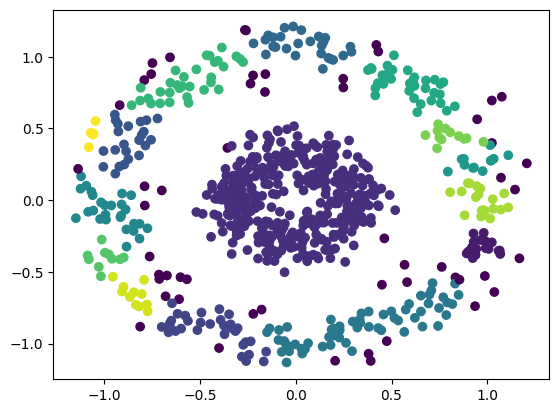

In [62]:
plt.scatter(x[:,0],x[:,1],c=dbscan.labels_)

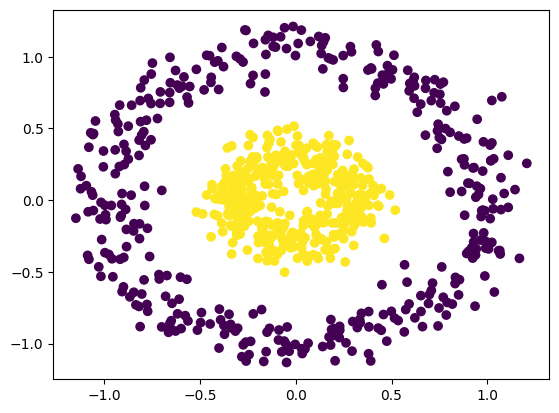

In [63]:
plt.scatter(x[:,0],x[:,1],c=y)